Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [2]:
sympy.init_printing(forecolor="black")

## Create dataset

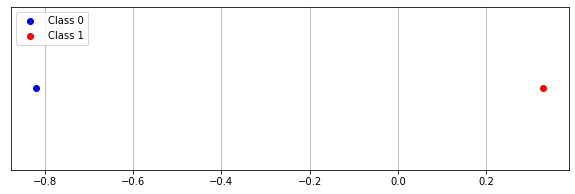

In [3]:
POINTS = 1
SCALE = 0.5
class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=POINTS), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=POINTS), decimals=2)
plt.figure(figsize=(10, 3))
plt.scatter(x=class0, y=np.zeros(POINTS), c="blue", label="Class 0")
plt.scatter(x=class1, y=np.zeros(POINTS), c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid(axis="x")
plt.gca().get_yaxis().set_visible(False)

## Handmade Neural network

Activation: sigmoid

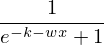

In [4]:
x_, k_, w_ = sympy.symbols("x k w")
nn = 1 / (1 + sympy.exp(-(w_ * x_ + k_)))
nn

### Define *loss* and calculate loss's gradient

In [5]:
def loss_function(v, e):
    return (v - e) ** 2

In [6]:
loss = 0
for x in class0:
    loss = loss + loss_function(nn.subs(x_, x), 0)
for x in class1:
    loss = loss + loss_function(nn.subs(x_, x), 1)
loss_f = sympy.lambdify((k_, w_), loss)
grad = sympy.derive_by_array(loss, (k_, w_))
grad_f = sympy.lambdify((k_, w_), grad)

Let's plot the loss

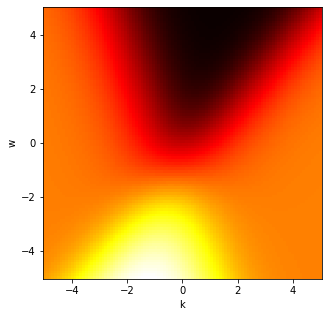

In [7]:
RANGE = 5

plt.figure(figsize=(5, 5))
t = np.linspace(-RANGE, RANGE, 100)
K, W = np.meshgrid(t, t)
plt.pcolormesh(K, W, loss_f(K, W), cmap="hot")
plt.xlabel("k")
plt.ylabel("w")
None

### Optimize NN's parameters 

Simple gradient descent (note: loss in log scale)

 1: [2.08295291 8.77779706] -> loss = 8.22980222145946e-05 / grad = [-2.17701299e-05 -8.86978694e-05]
 2: [2.08306376 8.77824867] -> loss = 8.225556307060413e-05 / grad = [-2.17589250e-05 -8.86522595e-05]
 3: [2.08293185 8.77771124] -> loss = 8.230609351251164e-05 / grad = [-2.17722599e-05 -8.87065396e-05]


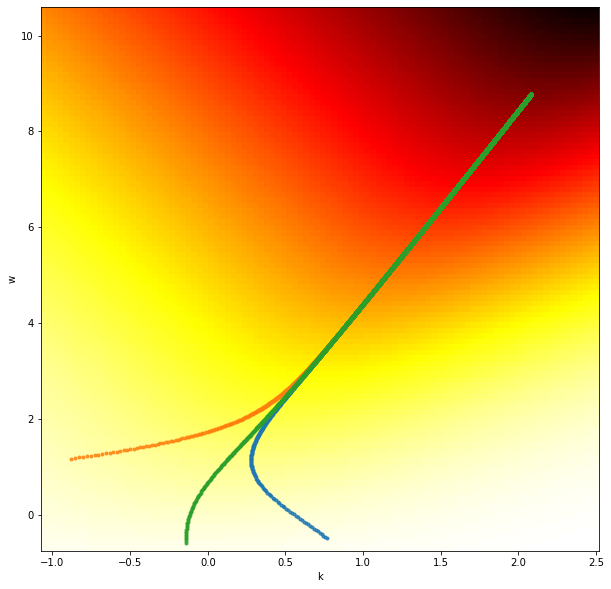

In [8]:
plt.figure(figsize=(10, 10))

minx, miny = 0, 0
maxx, maxy = 0, 0
paths = list()
for lines in range(3):
    points = [np.random.random(2) * RANGE - RANGE / 2]
    for step in range(100_000):
        p = points[-1]
        minx, miny = min(minx, p[0]), min(miny, p[1])
        maxx, maxy = max(maxx, p[0]), max(maxy, p[1])
        l = np.array(loss_f(*p))
        g = np.array(grad_f(*p))
        points.append(p - g / 10)
    paths.append(np.array(points))
    print(f"{lines+1:2d}: {np.array(p)} -> loss = {l} / grad = {g}")

x = np.linspace(minx * 1.2, maxx * 1.2, 100)
y = np.linspace(miny * 1.2, maxy * 1.2, 100)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, np.log(loss_f(X, Y)), cmap="hot")
for p in paths:
    plt.scatter(x=p[:, 0], y=p[:, 1], color=None, marker=".", alpha=0.8)

plt.xlabel("k")
plt.ylabel("w")
None

### Plot NN with fitted parameters

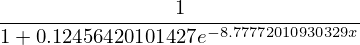

In [9]:
nn_fitted = nn.subs([(k_, paths[-1][-1][0]), (w_, paths[-1][-1][1])])
nn_fitted

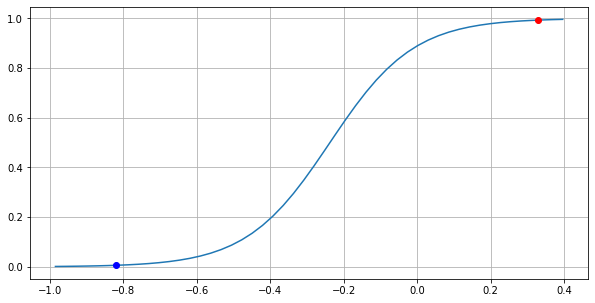

In [10]:
nn_f = sympy.lambdify(x_, nn_fitted)
x = np.linspace(min(class0.min(), class1.min()) * 1.2, max(class0.max(), class1.max()) * 1.2)
plt.figure(figsize=(10, 5))
plt.plot(x, nn_f(x))
for p in class0:
    plt.plot(p, nn_f(p), marker="o", color="blue")
for p in class1:
    plt.plot(p, nn_f(p), marker="o", color="red")
plt.grid()